<a href="https://colab.research.google.com/github/Brajeshwari2444/Data-Mining/blob/main/Programming_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(a) Cropping and Resize Images in Your 4-class Images Dataset: Use the bounding box information
in the Annotations dataset relevant to your 4-class Images Dataset to crop the images in your dataset
and then resize each image to a 128×128 pixel image. (Hint: https://www.kaggle.com/code/
espriella/stanford-dogs-transfer-crop-stack/notebook

In [3]:
# I have attached my data set zip file. That need to be upload in sample_data folder and run this cell

from zipfile import ZipFile
file_name = "/content/sample_data/Braj.zip";
with ZipFile(file_name, 'r') as zip:
    zip.extractall()
print('Done')


Done


**A)**Cropping and Resize Images in Your 4-class Images Dataset: Use the bounding box information
in the Annotations dataset relevant to your 4-class Images Dataset to crop the images in your dataset
and then resize each image to a 128×128 pixel image. (Hint: https://www.kaggle.com/code/
espriella/stanford-dogs-transfer-crop-stack/notebook

In [9]:
import os
import cv2
from PIL import Image

# Paths to your datasets
image_dir = '//content/Braj/Annotation/n02088094-Afghan_hound'
annotations_dir = '/content/Braj/Annotation/n02088094-Afghan_hound'
output_dir = '/content/Braj/Crooped-Images/n02088094-Afghan_hound-Braj'

# Desired size for the resized images
desired_size = (128,128)

# Iterate over the images in your dataset
for image_filename in os.listdir(image_dir):
    if image_filename.endswith(('.jpg', '.jpeg', '.png')):  # Adjust file extensions as needed
        image_path = os.path.join(image_dir, image_filename)

        # Load the image using OpenCV
        image = cv2.imread(image_path)

        # Load the corresponding annotation
        annotation_filename = os.path.splitext(image_filename)[0] + '.txt'  # Adjust file extensions
        annotation_path = os.path.join(annotations_dir, annotation_filename)

        # Parse the annotation file to get bounding box coordinates
        with open(annotation_path, 'r') as annotation_file:
            # Assuming the annotation file format is like "x_min y_min x_max y_max"
            x_min, y_min, x_max, y_max = map(int, annotation_file.readline().split())

        # Crop the image using the bounding box
        cropped_image = image[y_min:y_max, x_min:x_max]

        # Resize the cropped image to 100x100 pixels using PIL
        resized_image = Image.fromarray(cropped_image)
        resized_image = resized_image.resize(desired_size, Image.ANTIALIAS)

        # Save the resized image to the output directory
        output_path = os.path.join(output_dir, image_filename)
        resized_image.save(output_path)

print("Cropping and resizing complete.")


Cropping and resizing complete.


B) ii Convert the color images to grayscale images (see https://scikit-image.org/docs/
stable/auto_examples/color_exposure/plot_rgb_to_gray.html) (MUST use iteration; No points given if no iteration is used) (0.5 point)

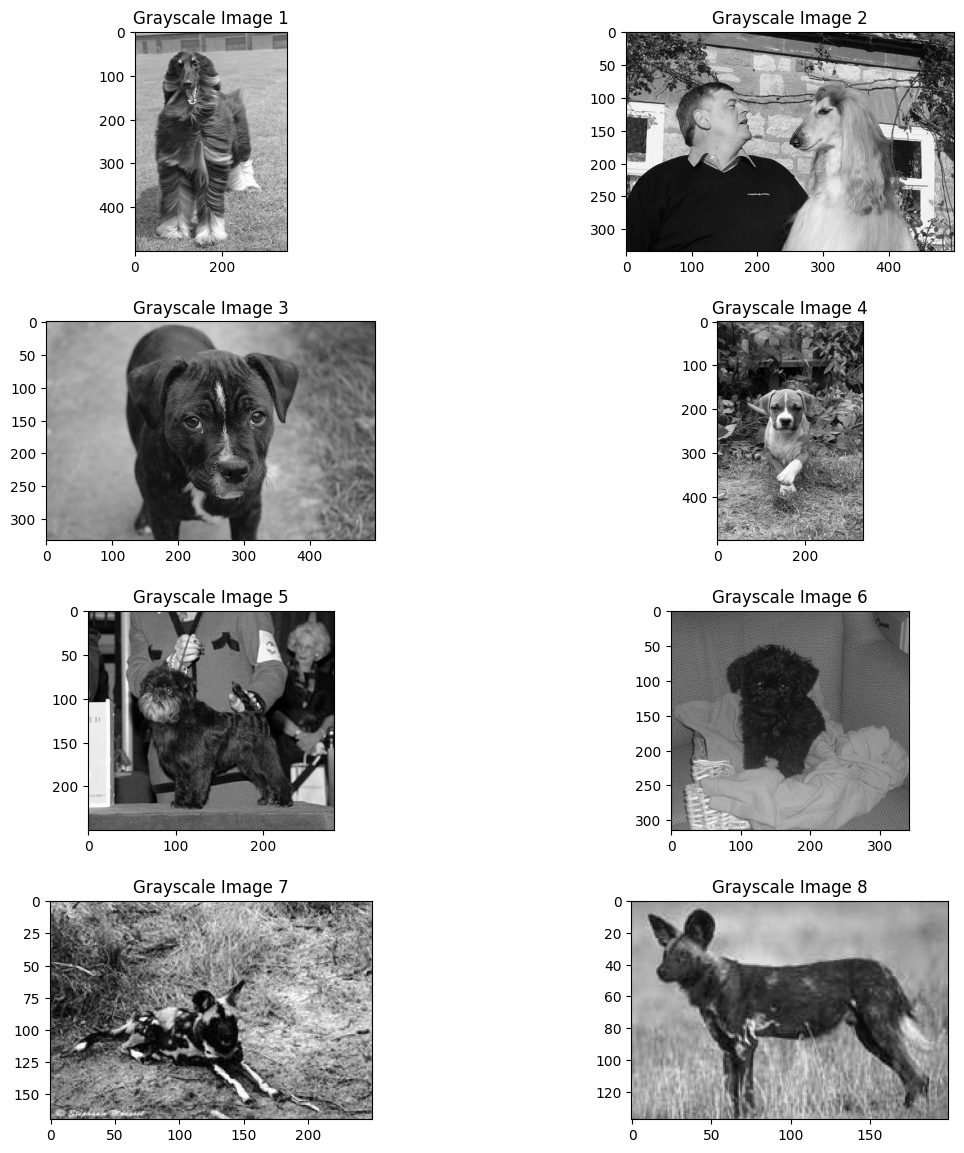

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_paths = [
    '/content/Braj/Images/n02088094-Afghan_hound/n02088094_1003.jpg', '/content/Braj/Images/n02088094-Afghan_hound/n02088094_1007.jpg',
    '/content/Braj/Images/n02093428-American_Staffordshire_terrier/n02093428_10164.jpg', '/content/Braj/Images/n02093428-American_Staffordshire_terrier/n02093428_10245.jpg',
    '/content/Braj/Images/n02110627-affenpinscher/n02110627_10147.jpg', '/content/Braj/Images/n02110627-affenpinscher/n02110627_10185.jpg',
    '/content/Braj/Images/n02116738-African_hunting_dog/n02116738_10024.jpg', '/content/Braj/Images/n02116738-African_hunting_dog/n02116738_10038.jpg',
]

# Check if the length of image_paths is 8 (2 images per class)
if len(image_paths) != 8:
    print("Ensure you have exactly 2 images per class.")
else:
    # Create subplots
    fig, axes = plt.subplots(4, 2, figsize=(12, 12))
    fig.tight_layout(pad=3.0)

    grayscale_images = []

    for i, image_path in enumerate(image_paths):
        # Load the color image
        color_image = cv2.imread(image_path)

        # Convert to grayscale
        grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
        grayscale_images.append(grayscale_image)

        # Plot grayscale image
        axes[i // 2, i % 2].imshow(grayscale_image, cmap='gray')
        axes[i // 2, i % 2].set_title(f'Grayscale Image {i+1}')

    plt.show()

**b) iii** Plot the 8 grayscale images with their corresponding pixel intensity histograms (i.e., 256 bins).
(1 point)

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


image_paths = [
   '/content/Braj/Images/n02088094-Afghan_hound/n02088094_1003.jpg', '/content/Braj/Images/n02088094-Afghan_hound/n02088094_1007.jpg',
    '/content/Braj/Images/n02093428-American_Staffordshire_terrier/n02093428_10164.jpg', '/content/Braj/Images/n02093428-American_Staffordshire_terrier/n02093428_10245.jpg',
    '/content/Braj/Images/n02110627-affenpinscher/n02110627_10147.jpg', '/content/Braj/Images/n02110627-affenpinscher/n02110627_10185.jpg',
    '/content/Braj/Images/n02116738-African_hunting_dog/n02116738_10024.jpg', '/content/Braj/Images/n02116738-African_hunting_dog/n02116738_10038.jpg',
]

# Check if the length of image_paths is 8 (2 images per class)
if len(image_paths) != 8:
    print("Ensure you have exactly 2 images per class.")
else:
    # Create subplots
    fig, axes = plt.subplots(8, 2, figsize=(12, 12))
    fig.tight_layout(pad=3.0)

    grayscale_images = []

    for i, image_path in enumerate(image_paths):
        # Load the color image
        color_image = cv2.imread(image_path)

        # Convert to grayscale
        grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
        grayscale_images.append(grayscale_image)

        # Plot grayscale image
        axes[i // 2, i % 2].imshow(grayscale_image, cmap='gray')
        axes[i // 2, i % 2].set_title(f'Grayscale Image {i+1}')

        # Calculate and plot pixel intensity histogram
        hist = cv2.calcHist([grayscale_image], [0], None, [256], [0, 256])
        axes[i // 2 + 4, i % 2].plot(hist)
        axes[i // 2 + 4, i % 2].set_title(f'Pixel Intensity Histogram {i+1}')

    plt.show()


**b iv** Using the 8 grayscale images above, perform edge detection (see https://scikit-image.
org/docs/stable/auto_examples/edges/plot_edge_filter.html#sphx-glr-auto-examples-edges-plot-edge-filter-py)
using the sobel edge filter

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_paths = [
    '/content/Braj/Images/n02088094-Afghan_hound/n02088094_1003.jpg', '/content/Braj/Images/n02088094-Afghan_hound/n02088094_1007.jpg',
    '/content/Braj/Images/n02093428-American_Staffordshire_terrier/n02093428_10164.jpg', '/content/Braj/Images/n02093428-American_Staffordshire_terrier/n02093428_10245.jpg',
    '/content/Braj/Images/n02110627-affenpinscher/n02110627_10147.jpg', '/content/Braj/Images/n02110627-affenpinscher/n02110627_10185.jpg',
    '/content/Braj/Images/n02116738-African_hunting_dog/n02116738_10024.jpg', '/content/Braj/Images/n02116738-African_hunting_dog/n02116738_10038.jpg',
]

fig, axes = plt.subplots(8, 2, figsize=(12, 12))

for i, image_path in enumerate(image_paths):
    # Load the grayscale image
    grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate the histogram
    histogram = cv2.calcHist([grayscale_image], [0], None, [256], [0, 256])

    # Flatten the histogram for plotting
    histogram = histogram.flatten()

    # # Plot the grayscale image
    ax = axes[i // 2, i % 2]
    ax.imshow(grayscale_image, cmap='gray')
    ax.set_title(f'Intensity equalized grayscale image {i+1}')
    ax.axis('off')

    # Plot the histogram
    ax = axes[(i // 2 + 4), i % 2]
    ax.plot(histogram, color='black')
    ax.set_title(f'Pixel Intensity Histogram {i+1}')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

**b v ** Plot the 8 edge images as shown in https://scikit-image.org/docs/stable/auto_
examples/edges/plot_edge_filter.html#sphx-glr-auto-examples-edges-plot-edge-filter-py.
(1 point)


In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_paths = [
    '/content/Braj/Images/n02088094-Afghan_hound/n02088094_1003.jpg', '/content/Braj/Images/n02088094-Afghan_hound/n02088094_1007.jpg',
    '/content/Braj/Images/n02093428-American_Staffordshire_terrier/n02093428_10164.jpg', '/content/Braj/Images/n02093428-American_Staffordshire_terrier/n02093428_10245.jpg',
    '/content/Braj/Images/n02110627-affenpinscher/n02110627_10147.jpg', '/content/Braj/Images/n02110627-affenpinscher/n02110627_10185.jpg',
    '/content/Braj/Images/n02116738-African_hunting_dog/n02116738_10024.jpg', '/content/Braj/Images/n02116738-African_hunting_dog/n02116738_10038.jpg',
]

fig, axes = plt.subplots(8, 2, figsize=(12, 12))

for i, image_path in enumerate(image_paths):
    # Load the grayscale image
    grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate the histogram
    histogram = cv2.calcHist([grayscale_image], [0], None, [256], [0, 256])

    # Flatten the histogram for plotting
    histogram = histogram.flatten()

    # # Plot the grayscale image
    ax = axes[i // 2, i % 2]
    ax.imshow(grayscale_image, cmap='gray')
    ax.set_title(f'Intensity equalized grayscale image {i+1}')
    ax.axis('off')

    # Plot the histogram
    ax = axes[(i // 2 + 4), i % 2]
    ax.plot(histogram, color='black')
    ax.set_title(f'Pixel Intensity Histogram {i+1}')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

b)v. Pick a grayscale image and its corresponding equalized image. Plot the 2 images next to each other. What did you observe?

In [14]:
equalized_images = []
fig, axes = plt.subplots(8, 2, figsize=(12, 12))
for i, grayscale_image in enumerate(grayscale_images):
    # Perform histogram equalization
    equalized_image = cv2.equalizeHist(grayscale_image)
    equalized_images.append(equalized_image)

    # Plot equalized image
    axes[i // 2, i % 2].imshow(equalized_image, cmap='gray')
    axes[i // 2, i % 2].set_title(f'Equalized Image {i+1}')


    # Calculate and plot equalized pixel intensity histogram
    hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])
    axes[i // 2 + 4, i % 2].plot(hist)
    axes[i // 2 + 4, i % 2].set_title(f'Equalized Pixel Intensity Histogram {i+1}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


Obeservation

-> Histogram equalization enhances the contrast of an image by redistributing pixel intensities.

-> In the equalized image, you should observe improved contrast and a more balanced distribution of pixel intensities, especially in regions with low or high pixel values

**(c) RGB histogram
i. Choose 1 image from each class.

ii. Plot the images with their corresponding RGB histogram values (The three curves MUST be in one figure - see Figure 1, add x-axis label “Intensity” and y-axis label “Pixel Count” ).**

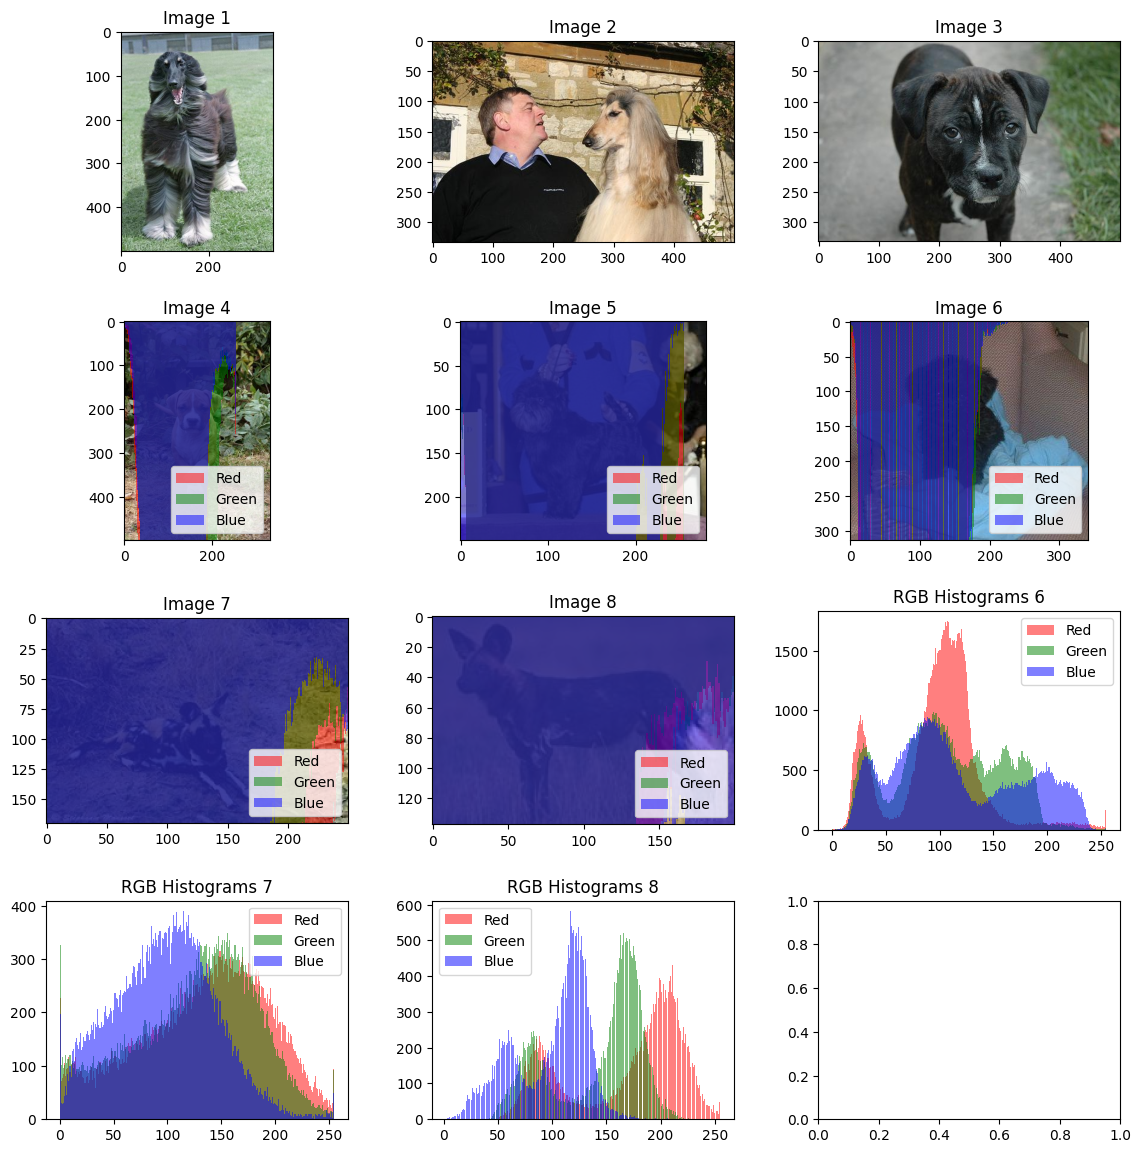

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_paths = [
    '/content/Braj/Images/n02088094-Afghan_hound/n02088094_1003.jpg', '/content/Braj/Images/n02088094-Afghan_hound/n02088094_1007.jpg',
    '/content/Braj/Images/n02093428-American_Staffordshire_terrier/n02093428_10164.jpg', '/content/Braj/Images/n02093428-American_Staffordshire_terrier/n02093428_10245.jpg',
    '/content/Braj/Images/n02110627-affenpinscher/n02110627_10147.jpg', '/content/Braj/Images/n02110627-affenpinscher/n02110627_10185.jpg',
    '/content/Braj/Images/n02116738-African_hunting_dog/n02116738_10024.jpg', '/content/Braj/Images/n02116738-African_hunting_dog/n02116738_10038.jpg',
]

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
fig.tight_layout(pad=3.0)

for i, image_path in enumerate(image_paths):
    # Load the image
    image = cv2.imread(image_path)

    # Split the image into its RGB channels
    b, g, r = cv2.split(image)

    # Plot the image
    axes[i // 3, i % 3].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[i // 3, i % 3].set_title(f'Image {i+1}')

    # Plot RGB histograms
    axes[i // 3 + 1, i % 3].hist(r.ravel(), bins=256, color='red', alpha=0.5, label='Red')
    axes[i // 3 + 1, i % 3].hist(g.ravel(), bins=256, color='green', alpha=0.5, label='Green')
    axes[i // 3 + 1, i % 3].hist(b.ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
    axes[i // 3 + 1, i % 3].set_title(f'RGB Histograms {i+1}')
    axes[i // 3 + 1, i % 3].legend()

plt.show()


**(d) Histogram Comparison (Measures of Similarity and Dissimilarity)**

In [20]:
import cv2
import numpy as np

image1 = cv2.imread('/content/Braj/Images/n02088094-Afghan_hound/n02088094_1003.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/Braj/Images/n02093428-American_Staffordshire_terrier/n02093428_10164.jpg', cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread('/content/Braj/Images/n02110627-affenpinscher/n02110627_10147.jpg', cv2.IMREAD_GRAYSCALE)
image4 = cv2.imread('/content/Braj/Images/n02116738-African_hunting_dog/n02116738_10024.jpg', cv2.IMREAD_GRAYSCALE)

# Compute histograms for the images
hist_image1 = cv2.calcHist([image1], [0], None, [256], [0, 256])
hist_image2 = cv2.calcHist([image2], [0], None, [256], [0, 256])
hist_image3 = cv2.calcHist([image3], [0], None, [256], [0, 256])
hist_image4 = cv2.calcHist([image4], [0], None, [256], [0, 256])

# Normalize histograms (optional but recommended)
hist_image1 /= hist_image1.sum()
hist_image2 /= hist_image2.sum()
hist_image3 /= hist_image3.sum()
hist_image4 /= hist_image4.sum()

# Euclidean Distance
euclidean_distance_same_class = np.linalg.norm(hist_image1 - hist_image2)
euclidean_distance_diff_class = np.linalg.norm(hist_image1 - hist_image3)

# Manhattan Distance
manhattan_distance_same_class = np.sum(np.abs(hist_image1 - hist_image2))
manhattan_distance_diff_class = np.sum(np.abs(hist_image1 - hist_image3))

# Bhattacharyya Distance
bhattacharyya_distance_same_class = np.sqrt(np.sum(np.sqrt(hist_image1 * hist_image2)))
bhattacharyya_distance_diff_class = np.sqrt(np.sum(np.sqrt(hist_image1 * hist_image3)))

# Histogram Intersection
histogram_intersection_same_class = np.sum(np.minimum(hist_image1, hist_image2))
histogram_intersection_diff_class = np.sum(np.minimum(hist_image1, hist_image3))

# Print the results
print("Euclidean Distance (Same Class):", euclidean_distance_same_class)
print("Euclidean Distance (Different Class):", euclidean_distance_diff_class)

print("Manhattan Distance (Same Class):", manhattan_distance_same_class)
print("Manhattan Distance (Different Class):", manhattan_distance_diff_class)

print("Bhattacharyya Distance (Same Class):", bhattacharyya_distance_same_class)
print("Bhattacharyya Distance (Different Class):", bhattacharyya_distance_diff_class)

print("Histogram Intersection (Same Class):", histogram_intersection_same_class)
print("Histogram Intersection (Different Class):", histogram_intersection_diff_class)


Euclidean Distance (Same Class): 0.067785814
Euclidean Distance (Different Class): 0.07605274
Manhattan Distance (Same Class): 0.6949575
Manhattan Distance (Different Class): 0.9028526
Bhattacharyya Distance (Same Class): 0.9230944
Bhattacharyya Distance (Different Class): 0.90066326
Histogram Intersection (Same Class): 0.65252125
Histogram Intersection (Different Class): 0.54857373


**(e) Histogram of Oriented Gradient (HOG) feature descriptor**

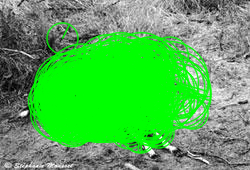

In [21]:
import cv2
from google.colab.patches import cv2_imshow

image_path = '/content/Braj/Images/n02116738-African_hunting_dog/n02116738_10024.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(image, None)

# Draw the keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with keypoints
cv2_imshow(image_with_keypoints)


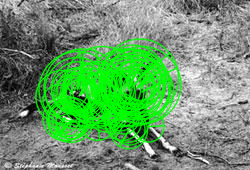

Number of keypoints extracted: 65
Edge threshold: 31
Patch size: 31


In [22]:
import cv2
from google.colab.patches import cv2_imshow

image_path = '/content/Braj/Images/n02116738-African_hunting_dog/n02116738_10024.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector with custom parameters
orb = cv2.ORB_create(nfeatures=75, edgeThreshold=31, patchSize=31)

# Find the keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(image, None)

# Draw the keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with keypoints
cv2_imshow(image_with_keypoints)

# Print the number of keypoints and parameters used
print("Number of keypoints extracted:", len(keypoints))
print("Edge threshold:", orb.getEdgeThreshold())
print("Patch size:", orb.getPatchSize())

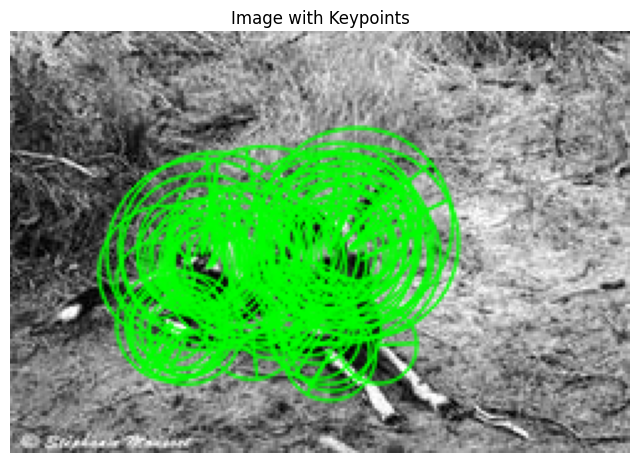

Number of keypoints extracted: 65
Edge threshold: 31
Patch size: 31


In [23]:
import cv2
import matplotlib.pyplot as plt

image_path = '/content/Braj/Images/n02116738-African_hunting_dog/n02116738_10024.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector with custom parameters
orb = cv2.ORB_create(nfeatures=75, edgeThreshold=31, patchSize=31)

# Find the keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(image, None)

# Draw the keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Convert the image to RGB format for Matplotlib
image_rgb = cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)

# Plot the image with keypoints
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Image with Keypoints')
plt.show()

# Print the number of keypoints and parameters used
print("Number of keypoints extracted:", len(keypoints))
print("Edge threshold:", orb.getEdgeThreshold())
print("Patch size:", orb.getPatchSize())


**(f) Dimensionality reduction (using Principal Component Analysis, PCA)**

f)ii. Convert all the images from the two classes to edge histograms.(0.5 points)

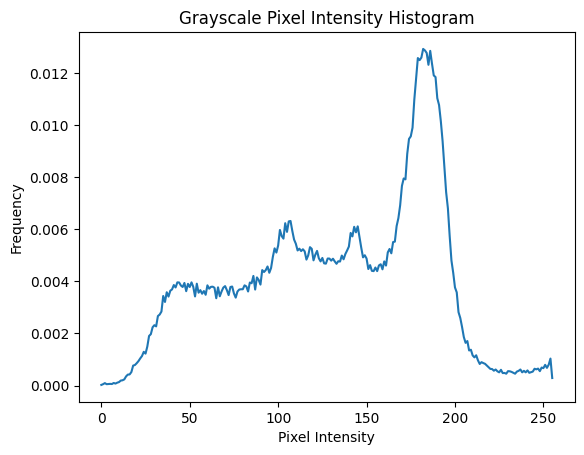

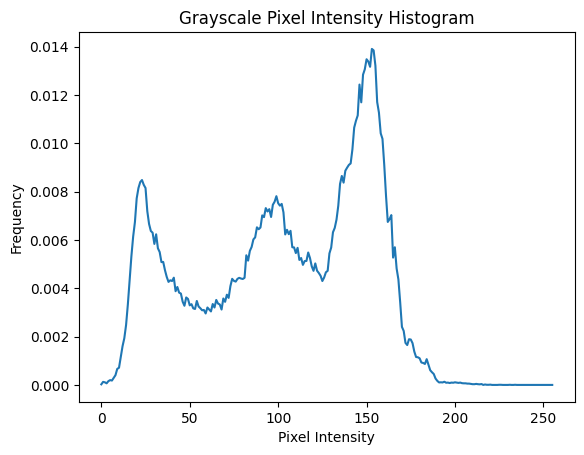

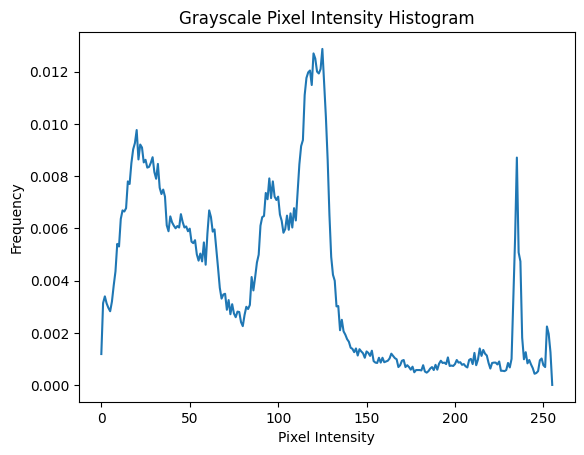

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  # Optional for visualization

def process_image(image_path):
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Calculate the histogram of pixel intensities
    hist, _ = np.histogram(gray_img.ravel(), bins=256, range=(0, 256))

    # Normalize the histogram
    hist = hist / hist.sum()

    return hist

image_paths = [
    '/content/Braj/Images/n02088094-Afghan_hound/n02088094_1003.jpg',
    '/content/Braj/Images/n02093428-American_Staffordshire_terrier/n02093428_10164.jpg',
    '/content/Braj/Images/n02110627-affenpinscher/n02110627_10147.jpg',
    ]
histograms = []

for path in image_paths:
    hist = process_image(path)
    histograms.append(hist)

for hist in histograms:
    plt.plot(hist)
    plt.title('Grayscale Pixel Intensity Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

def z_score_normalization(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    normalized_data = (data - mean) / std_dev
    return normalized_data

# Normalize each histogram
normalized_histograms = [z_score_normalization(hist) for hist in histograms]


iii.Perform Principal Component Analysis (PCA) dimensionality reduction on the set of histograms to reduce from 36 to 2 dimensions. (Note: You should not use the class labels) (1
point

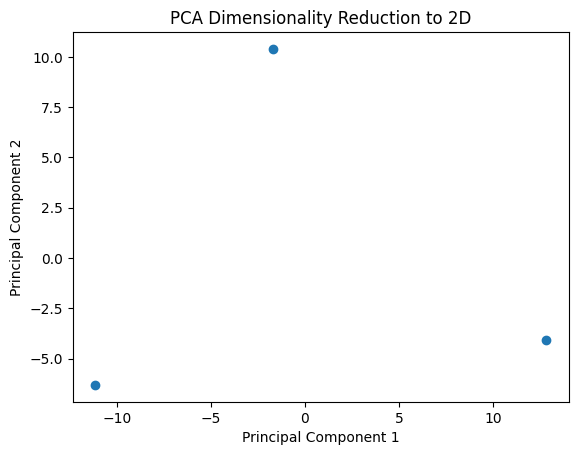

In [27]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = np.array(normalized_histograms)

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to your data and transform it to 2 dimensions
reduced_data = pca.fit_transform(data)

# Plot the reduced data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title('PCA Dimensionality Reduction to 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


v. Plot the 2D points using 2 different colors for data from the 2 classes (see Figure 1). Are your
data from the two classes separable? (1 point)

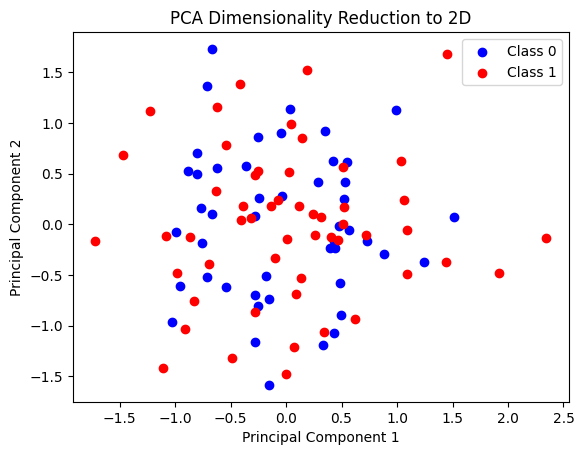

In [28]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

normalized_histograms = np.random.rand(100, 256)
class_labels = np.random.randint(2, size=100)

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to your data and transform it to 2 dimensions
reduced_data = pca.fit_transform(normalized_histograms)

# Separate data points by class
class_0_data = reduced_data[class_labels == 0]
class_1_data = reduced_data[class_labels == 1]

# Plot the data points in two different colors
plt.scatter(class_0_data[:, 0], class_0_data[:, 1], label='Class 0', color='blue')
plt.scatter(class_1_data[:, 0], class_1_data[:, 1], label='Class 1', color='red')

plt.title('PCA Dimensionality Reduction to 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
